## Introduction

In this guided project, we'll extend the work we did in the last two missions on visualizing the gender gap across college degrees. So far, we mostly focused on the STEM degrees but now we will generate line charts to compare across all degree categories. In the last step of this guided project, we'll explore how to export the final diagram we create as an image file.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

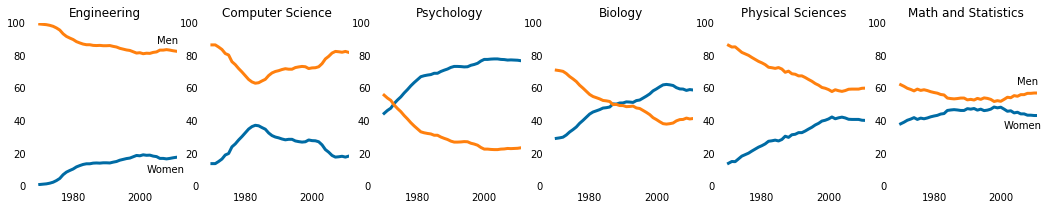

In [2]:
women_degrees = pd.read_csv('data/percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255,128/255,14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18,3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    if sp == 0:
        ax.text(2005, 87, "Men")
        ax.text(2002, 8, "Women")
    elif sp == 5:
        ax.text(2005, 62, "Men")
        ax.text(2001, 35, "Women")
        
plt.show()

### Comparing across all degrees

Because there are seventeen degrees that we need to generate line charts for, we'll use a subplot grid layout of 6 rows by 3 columns. We can then group the degrees into STEM, liberal arts, and other, in the following way:
```
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']
```
Here's what the diagram will look like:

<img src="_images/149_comparing_across_categories.png" />

While the `stem_cats` list was ordered by ending gender gap, all three of these lists are ordered in descending order by the percentage of degrees awarded to women. While `stem_cats` and `other_cats` have six degree categories as elements, `lib_arts_cats` only has five. We'll need to not only modify the for loop to generate the STEM line charts that we wrote but also add two new for loops to generate the line charts for liberal arts degrees and for other degrees.

In [3]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

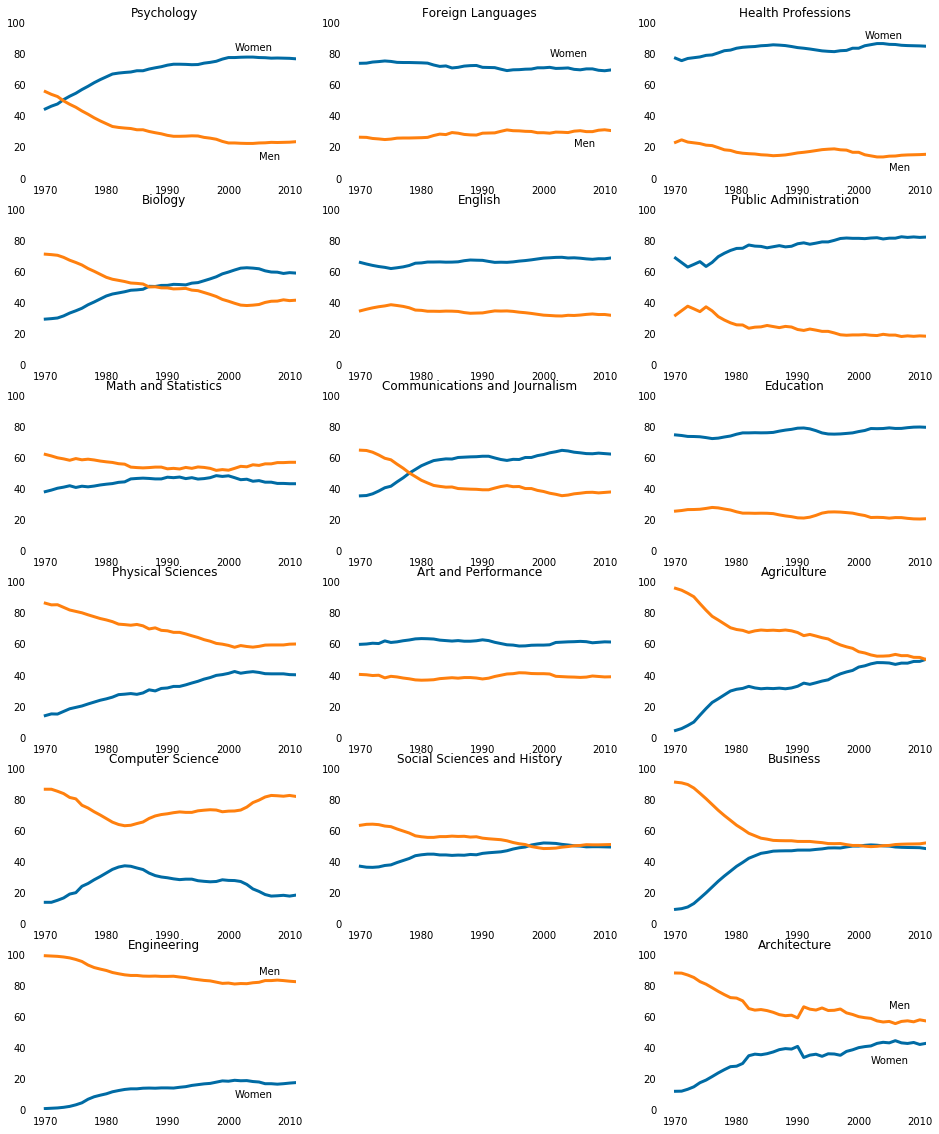

In [4]:
fig = plt.figure(figsize=(16,20))

# Generating plots  for the first column

for sp in range(0,18,3): # STEM Category
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    if cat_index == 0:
        ax.text(2001, 82, "Women")
        ax.text(2005, 12, "Men")
    elif cat_index == 5:
        ax.text(2005, 87, "Men")
        ax.text(2001, 8, "Women")
        
# Generating plots  for the second column
        
for sp in range(1,16,3): # Liberal Arts Category
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    if cat_index == 0:
        ax.text(2001, 78, "Women")
        ax.text(2005, 20, "Men")
        
# Generating plots  for the third column

for sp in range(2,18,3): # Other Category
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    if cat_index == 0:
        ax.text(2001, 90, "Women")
        ax.text(2005, 5, "Men")
    elif cat_index == 5:
        ax.text(2005, 65, "Men")
        ax.text(2002, 30, "Women")
        
plt.show()

### Hiding x-axis labels

With seventeen line charts in one diagram, the non-data elements quickly clutter the field of view.The most immediate issue that sticks out is the titles of some line charts overlapping with the x-axis labels for the line chart above it. If we remove the titles for each line chart, the viewer won't know what degree each line chart refers to. Let's instead remove the x-axis labels for every line chart in a column except for the bottom most one. We can accomplish this by modifying the call to Axes.tick_params() and setting labelbottom to off:
```
ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
```
This will disable the x-axis labels for all of the line charts. You can then enable the x-axis labels for the bottommost line charts in each column:
```
ax.tick_params(labelbottom='on')
```

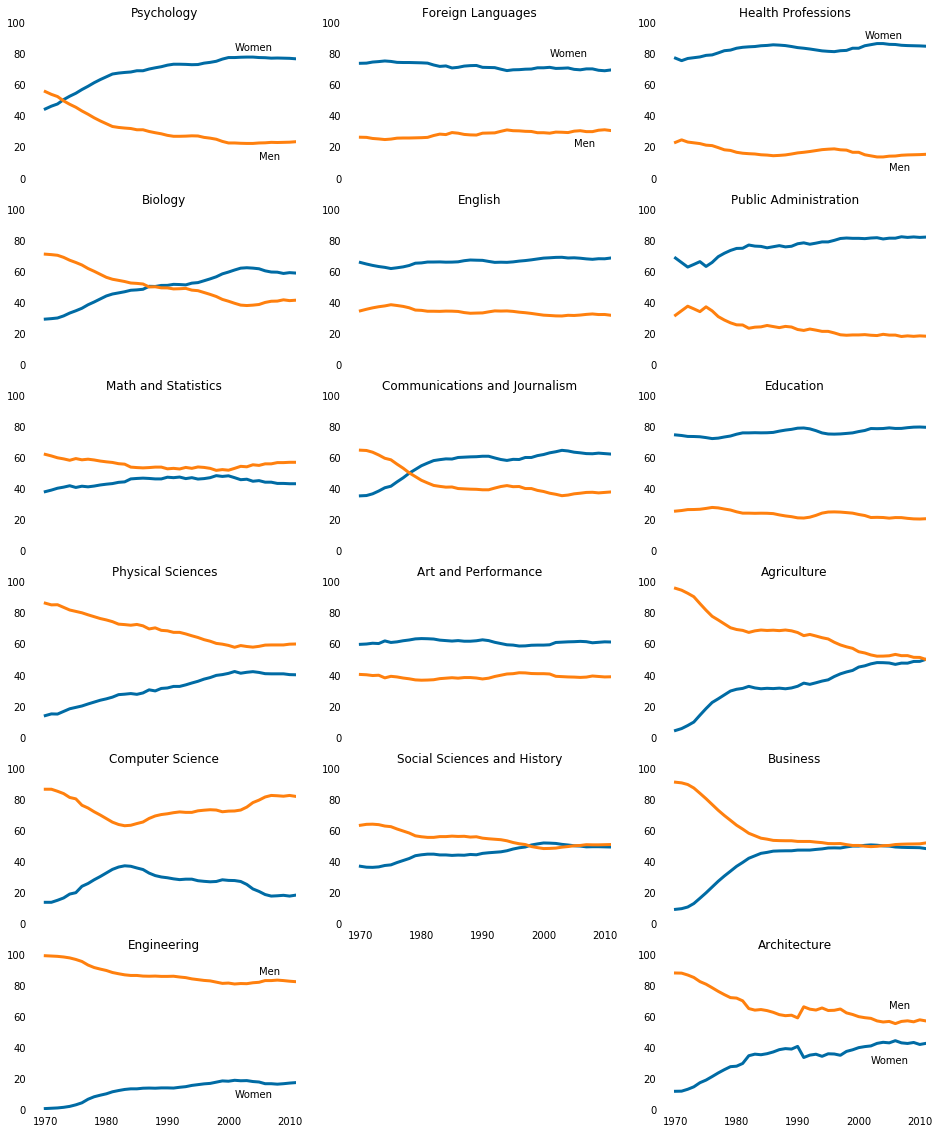

In [5]:
fig = plt.figure(figsize=(16,20))

# Generating plots  for the first column

for sp in range(0,18,3): # STEM Category
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(stem_cats[cat_index])
    # Hiding X labels
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    if cat_index == 0:
        ax.text(2001, 82, "Women")
        ax.text(2005, 12, "Men")
    elif cat_index == 5:
        ax.text(2005, 87, "Men")
        ax.text(2001, 8, "Women")
        ax.tick_params(labelbottom=True)
        
# Generating plots  for the second column
        
for sp in range(1,16,3): # Liberal Arts Category
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(lib_arts_cats[cat_index])
    # Hiding X labels
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    if cat_index == 0:
        ax.text(2001, 78, "Women")
        ax.text(2005, 20, "Men")
    elif cat_index == 4:
        ax.tick_params(labelbottom=True)
        
# Generating plots  for the third column

for sp in range(2,18,3): # Other Category
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(other_cats[cat_index])
    # Hiding X labels
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    if cat_index == 0:
        ax.text(2001, 90, "Women")
        ax.text(2005, 5, "Men")
    elif cat_index == 5:
        ax.text(2005, 65, "Men")
        ax.text(2002, 30, "Women")
        ax.tick_params(labelbottom=True)
        
plt.show()

Removing the x-axis labels for all but the bottommost plots solved the issue we noticed with the overlapping text. In addition, the plots are cleaner and more readable. The trade-off we made is that it's now more difficult for the viewer to discern approximately which years some interesting changes in trends may have happened. This is acceptable because we're primarily interested in enabling the viewer to quickly get a high level understanding of which degrees are prone to gender imbalance and how that has changed over time.

### Setting y-axis labels

Currently, all seventeen plots have six y-axis labels and even though they are consistent across the plots, they still add to the visual clutter. By keeping just the starting and ending labels (`0` and `100`), we can keep some of the benefits of having the y-axis labels to begin with.

We can use the `Axes.set_yticks()` method to specify which labels we want displayed. The following code enables just the `0` and `100` labels to be displayed:
```
ax.set_yticks([0,100])
```

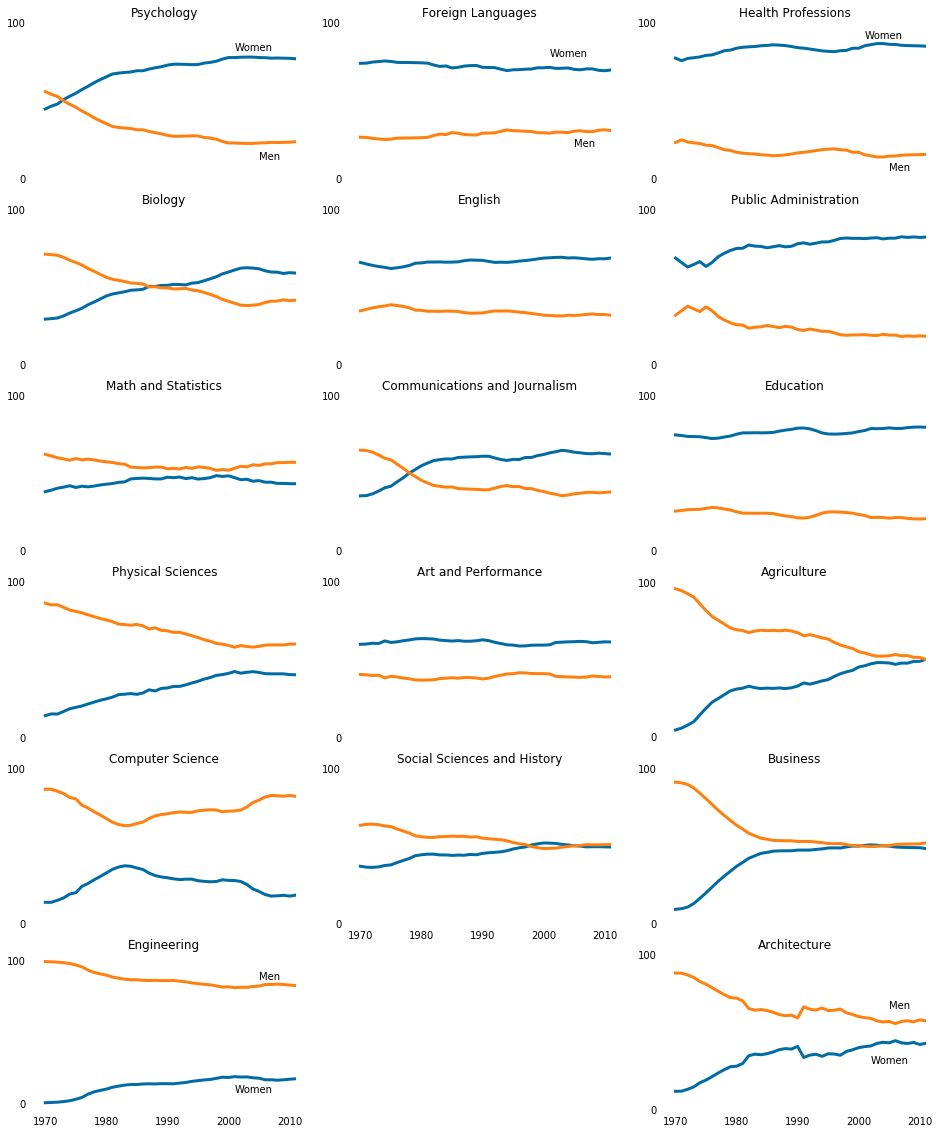

In [6]:
fig = plt.figure(figsize=(16,20))

# Generating plots  for the first column

for sp in range(0,18,3): # STEM Category
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    # Setting y-axis labels
    ax.set_yticks([0, 100]) 
    ax.set_title(stem_cats[cat_index])
    # Hiding X labels
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    if cat_index == 0:
        ax.text(2001, 82, "Women")
        ax.text(2005, 12, "Men")
    elif cat_index == 5:
        ax.text(2005, 87, "Men")
        ax.text(2001, 8, "Women")
        ax.tick_params(labelbottom=True)
        
# Generating plots  for the second column
        
for sp in range(1,16,3): # Liberal Arts Category
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    # Setting y-axis labels
    ax.set_yticks([0, 100])
    ax.set_title(lib_arts_cats[cat_index])
    # Hiding X labels
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    if cat_index == 0:
        ax.text(2001, 78, "Women")
        ax.text(2005, 20, "Men")
    elif cat_index == 4:
        ax.tick_params(labelbottom=True)
        
# Generating plots  for the third column

for sp in range(2,18,3): # Other Category
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    # Setting y-axis labels
    ax.set_yticks([0, 100])
    ax.set_title(other_cats[cat_index])
    # Hiding X labels
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    if cat_index == 0:
        ax.text(2001, 90, "Women")
        ax.text(2005, 5, "Men")
    elif cat_index == 5:
        ax.text(2005, 65, "Men")
        ax.text(2002, 30, "Women")
        ax.tick_params(labelbottom=True)
        
plt.show()

While removing most of the y-axis labels definitely reduced clutter, it also made it hard to understand which degrees have close to 50-50 gender breakdown. While keeping all of the y-axis labels would have made it easier, we can actually do one better and use a horizontal line across all of the line charts where the y-axis label 50 would have been.

### Adding a horizontal line

We can generate a horizontal line across an entire subplot using the `Axes.axhline()` method. The only required parameter is the y-axis location for the start of the line:
```
ax.axhline(50)
```
Let's use the next color in the Color Blind 10 palette for this horizontal line, which has an RGB value of (171, 171, 171). Because we don't want this line to clutter the viewing experience, let's increase the transparency of the line. We can set the color using the `c` parameter and the transparency using the `alpha` parameter. The value passed in to the `alpha` parameter must range between `0` and `1`:
```
ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
```

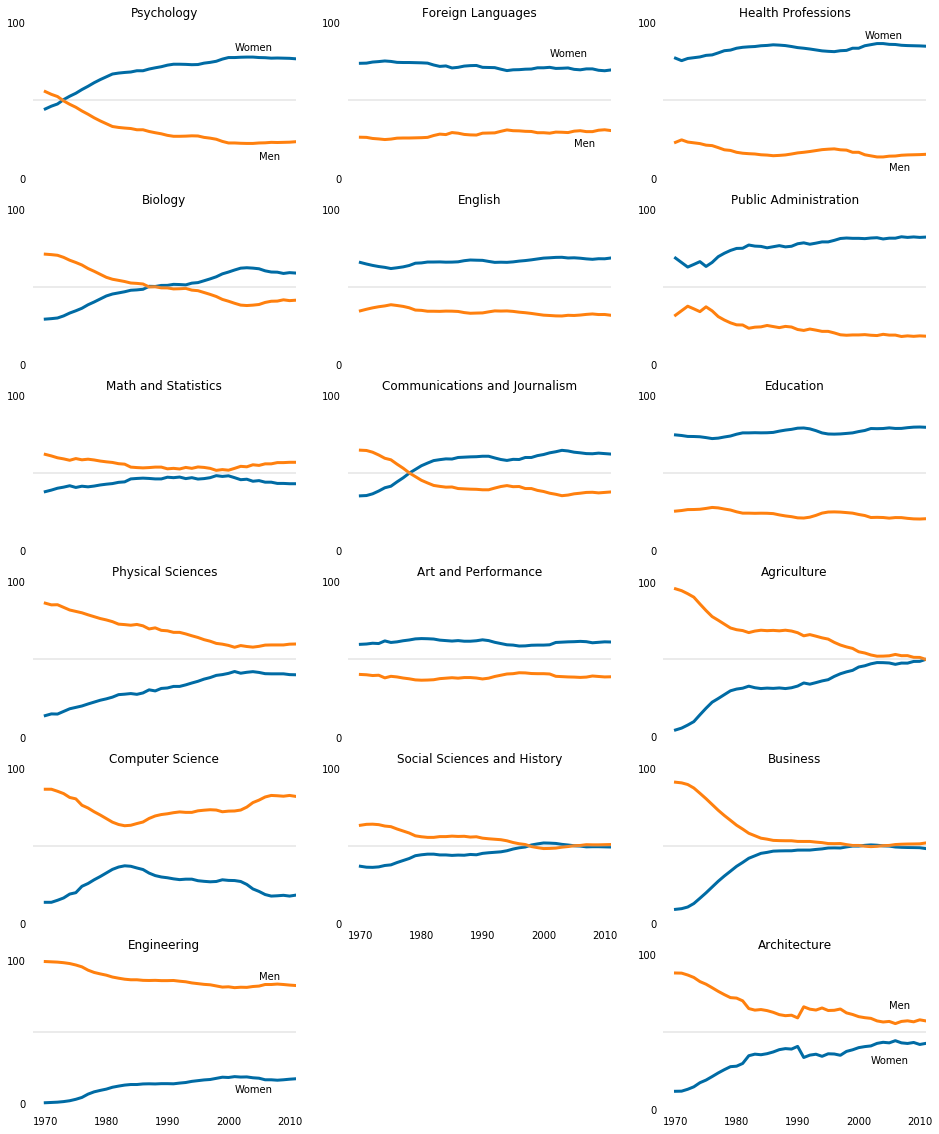

In [7]:
fig = plt.figure(figsize=(16,20))
lgray = (171/255,171/255,171/255)

# Generating plots  for the first column

for sp in range(0,18,3): # STEM Category
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    # Add Horizontal line
    ax.axhline(50, c=lgray, alpha=0.3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    # Setting y-axis labels
    ax.set_yticks([0, 100]) 
    ax.set_title(stem_cats[cat_index])
    # Hiding X labels
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    if cat_index == 0:
        ax.text(2001, 82, "Women")
        ax.text(2005, 12, "Men")
    elif cat_index == 5:
        ax.text(2005, 87, "Men")
        ax.text(2001, 8, "Women")
        ax.tick_params(labelbottom=True)
        
# Generating plots  for the second column
        
for sp in range(1,16,3): # Liberal Arts Category
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    # Add Horizontal line
    ax.axhline(50, c=lgray, alpha=0.3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    # Setting y-axis labels
    ax.set_yticks([0, 100])
    ax.set_title(lib_arts_cats[cat_index])
    # Hiding X labels
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    if cat_index == 0:
        ax.text(2001, 78, "Women")
        ax.text(2005, 20, "Men")
    elif cat_index == 4:
        ax.tick_params(labelbottom=True)
        
# Generating plots  for the third column

for sp in range(2,18,3): # Other Category
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    # Add Horizontal line
    ax.axhline(50, c=lgray, alpha=0.3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    # Setting y-axis labels
    ax.set_yticks([0, 100])
    ax.set_title(other_cats[cat_index])
    # Hiding X labels
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    if cat_index == 0:
        ax.text(2001, 90, "Women")
        ax.text(2005, 5, "Men")
    elif cat_index == 5:
        ax.text(2005, 65, "Men")
        ax.text(2002, 30, "Women")
        ax.tick_params(labelbottom=True)
        
plt.show()

### Exporting to a file

We can use Figure.savefig() or pyplot.savefig() to export all of the plots contained in the figure as a single image file. Note that these have to be called before we display the figure using pyplot.show().:
```
plt.plot(women_degrees['Year'], women_degrees['Biology'])
plt.savefig('biology_degrees.png')
```
Exporting plots we create using matplotlib allows us to use them in Word documents, Powerpoint presentations, and even in emails.

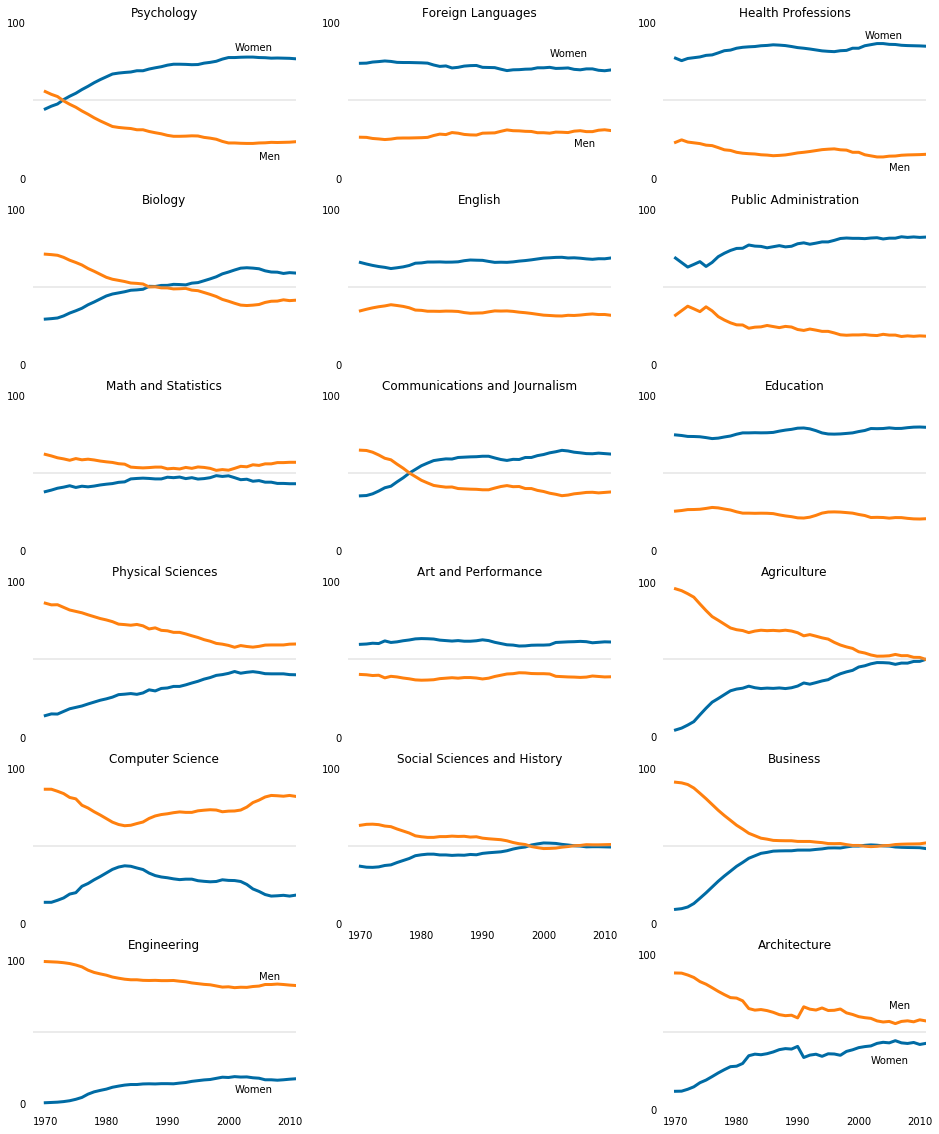

In [8]:
fig = plt.figure(figsize=(16,20))
lgray = (171/255,171/255,171/255)

# Generating plots  for the first column

for sp in range(0,18,3): # STEM Category
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    # Add Horizontal line
    ax.axhline(50, c=lgray, alpha=0.3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    # Setting y-axis labels
    ax.set_yticks([0, 100]) 
    ax.set_title(stem_cats[cat_index])
    # Hiding X labels
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    if cat_index == 0:
        ax.text(2001, 82, "Women")
        ax.text(2005, 12, "Men")
    elif cat_index == 5:
        ax.text(2005, 87, "Men")
        ax.text(2001, 8, "Women")
        ax.tick_params(labelbottom=True)
        
# Generating plots  for the second column
        
for sp in range(1,16,3): # Liberal Arts Category
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    # Add Horizontal line
    ax.axhline(50, c=lgray, alpha=0.3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    # Setting y-axis labels
    ax.set_yticks([0, 100])
    ax.set_title(lib_arts_cats[cat_index])
    # Hiding X labels
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    if cat_index == 0:
        ax.text(2001, 78, "Women")
        ax.text(2005, 20, "Men")
    elif cat_index == 4:
        ax.tick_params(labelbottom=True)
        
# Generating plots  for the third column

for sp in range(2,18,3): # Other Category
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    # Add Horizontal line
    ax.axhline(50, c=lgray, alpha=0.3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    # Setting y-axis labels
    ax.set_yticks([0, 100])
    ax.set_title(other_cats[cat_index])
    # Hiding X labels
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    if cat_index == 0:
        ax.text(2001, 90, "Women")
        ax.text(2005, 5, "Men")
    elif cat_index == 5:
        ax.text(2005, 65, "Men")
        ax.text(2002, 30, "Women")
        ax.tick_params(labelbottom=True)
        
plt.savefig('_images/gender_degrees.png')
plt.show()